In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
from monetplot import MonetPlot
import numpy as np
import pandas as pd
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

## Enjoy the Examples  🛀 

### 양 axis에 Distribution + Scatter

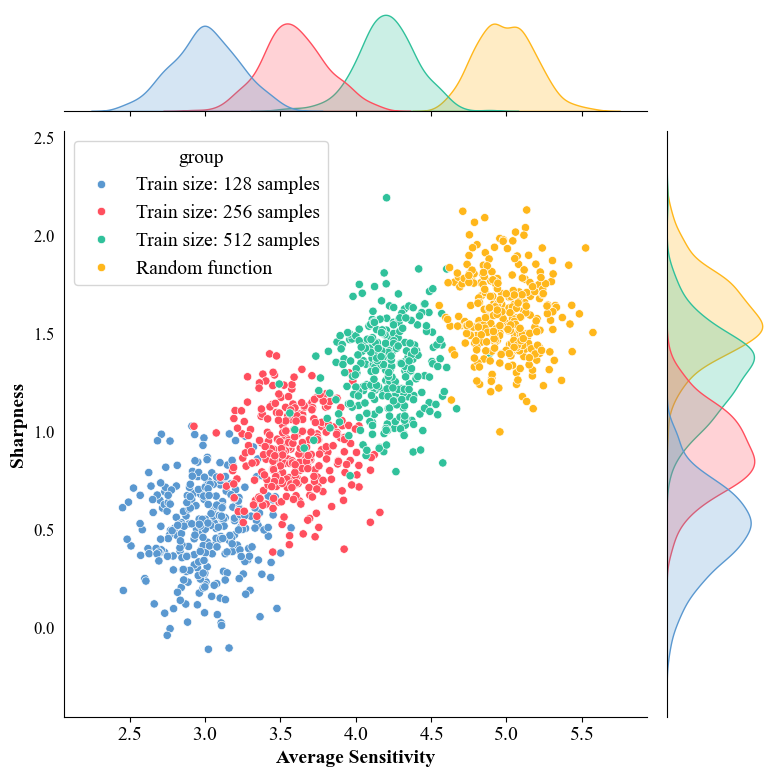

In [11]:
from style.genevive import genevive
import seaborn as sns
plt.rcParams["font.family"] = "Times new roman"

# 샘플 데이터
df = pd.DataFrame({
    'sensitivity': np.concatenate([
        np.random.normal(3.0, 0.2, 300),
        np.random.normal(3.6, 0.2, 300),
        np.random.normal(4.2, 0.2, 300),
        np.random.normal(5.0, 0.2, 300)
    ]),
    'sharpness': np.concatenate([
        np.random.normal(0.5, 0.2, 300),
        np.random.normal(0.9, 0.2, 300),
        np.random.normal(1.3, 0.2, 300),
        np.random.normal(1.6, 0.2, 300)
    ]),
    'group': np.repeat([
        'Train size: 128 samples',
        'Train size: 256 samples',
        'Train size: 512 samples',
        'Random function'
    ], 300)
})

# 레이아웃 설정
with plt.style.context(genevive["plot"]):
    g = sns.jointplot(
    data=df,
    x='sensitivity',
    y='sharpness',
    hue='group',
    kind='scatter',
    marginal_kws=dict(common_norm=False, fill=True),
    height=8
    )

    g.ax_joint.set_xlabel("Average Sensitivity", weight='bold')
    g.ax_joint.set_ylabel("Sharpness", weight='bold')
    plt.show()


### 크기에 비례하는 Scatter (e.g, 크기=Model Size) 

<Figure size 640x480 with 0 Axes>

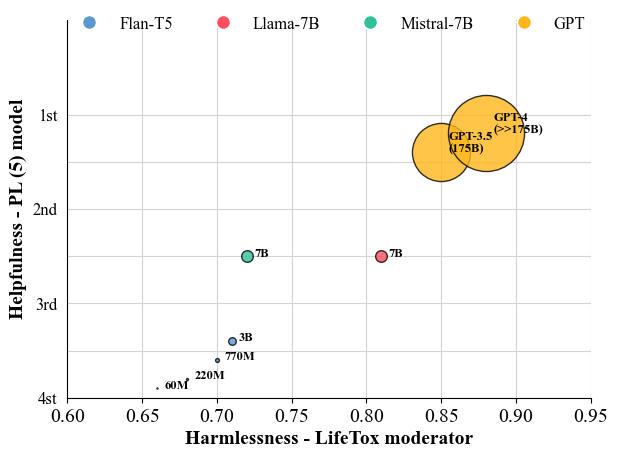

In [9]:
# 데이터: [harmlessness, helpfulness rank, 크기, 모델명, 계열]
models = [
    (0.66, 3.9, 60, "60M", "Flan-T5"),
    (0.68, 3.8, 220, "220M", "Flan-T5"),
    (0.70, 3.6, 770, "770M", "Flan-T5"),
    (0.71, 3.4, 3000, "3B", "Flan-T5"),
    (0.72, 2.5, 7000, "7B", "Mistral-7B"),
    (0.81, 2.5, 7000, "7B", "Llama-7B"),
    (0.85, 1.4, 175000, "GPT-3.5\n(175B)", "GPT"),
    (0.88, 1.2, 300000, "GPT-4\n(>>175B)", "GPT"),
]
plot_cycle = ["#5A98D0", "#FF4F5E", "#30C19B", "#FFB71B", "#C048B9"]

colors = {
    "Flan-T5": plot_cycle[0],
    "Llama-7B": plot_cycle[1],
    "Mistral-7B": plot_cycle[2],
    "GPT": plot_cycle[3]
}

with plt.style.context(genevive["plot"]):
    plt.clf()
    fig, ax = plt.subplots()

    for x, y, size, label, model_type in models:
        ax.scatter(x, y, s=size/100, label=model_type if "7B" not in label else None, color = colors[model_type], alpha=0.8, edgecolor="black", zorder=2)
        ax.text(x + 0.005, y, label, fontsize=9, weight="bold")

    # 축 설정
    ax.set_xlabel("Harmlessness - LifeTox moderator", weight="bold")
    ax.set_ylabel("Helpfulness - PL (5) model", weight="bold")
    ax.set_yticks([1, 1.5, 2, 2.5, 3, 3.5, 4])
    ax.set_yticklabels(["1st", "", "2nd", "", "3rd", "", "4st"])
    ax.set_xlim(0.6, .95)
    ax.set_ylim(4, 0)  # Helpfulness 순위는 위로 갈수록 높음

    # 범례
    handles = []
    for name, color in colors.items():
        handles.append(plt.Line2D([], [], marker='o', color='w', label=name,
                                markerfacecolor=color, markersize=10))

    
    ax.legend(handles=handles, loc="upper center", ncols=4, bbox_to_anchor=(0.5, 1.05), frameon=False, fontsize=12)
    ax.spines["left"].set_visible(True)
    plt.grid(zorder=1)
    plt.tight_layout()
    plt.show()
    fig.savefig("temp.png", dpi=300)

### Before/After를 나타내는 Scatter

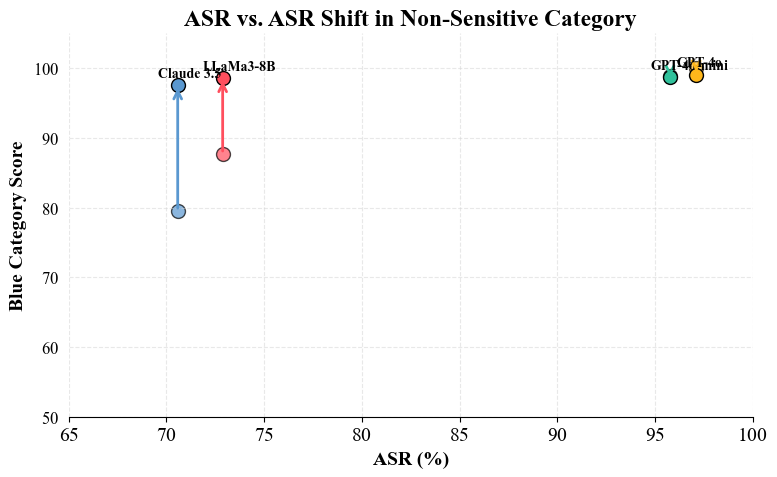

In [11]:
from style.genevive import genevive
import pandas as pd
# 데이터 정의
data = {
    "Model": ["Claude 3.5", "LLaMa3-8B", "GPT-4o-mini", "GPT-4o"],
    "ASR": [70.58, 72.88, 95.77, 97.11], 
    "BlueAvg_before": [52.90, 55.80, 93.48, 97.10],
    "BlueAvg_after": [87.820, 78.865, 98.635, 97.760],
    "RedAvg_before": [79.53, 87.72, 98.83, 100.0],
    "RedAvg_after": [97.550, 98.585, 98.750, 99.080]
}

# DataFrame 생성 및 차이 계산
df = pd.DataFrame(data)

# 색상 지정 (예시로 Claude/LLaMa는 파랑, GPT 계열은 빨강)
colors = ["#5A98D0", "#FF4F5E", "#30C19B", "#FFB71B", "#C048B9", "#104080"]

with plt.style.context(genevive["plot"]):
    # 그래프 생성
    fig, ax = plt.subplots(figsize=(8, 5))
    for i in range(len(df)):
        y_before = df["RedAvg_before"][i]
        y_after = df["RedAvg_after"][i]
        x = df["ASR"][i]

        ax.scatter(x, y_before, color=colors[i], s=100, edgecolor="black", alpha=0.7)
        ax.scatter(x, y_after, color=colors[i], s=100, edgecolor="black", alpha=1.0)
        ax.annotate("",
                    xy=(x, y_after), xycoords='data',
                    xytext=(x, y_before), textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=colors[i], lw=2))
        if i==3:
            offset = 1.2
        else:
            offset = 1.2
        ax.text(x-1, y_after + offset, df["Model"][i], fontsize=10, weight="bold")

    # 축 설정
    ax.set_ylabel("Blue Category Score", weight="bold")
    ax.set_xlabel("ASR (%)", weight="bold")
    ax.set_ylim(50, 105)
    ax.set_xlim(65, 100)
    ax.set_title("ASR vs. ASR Shift in Non-Sensitive Category", weight="bold")
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### **Trajectories** 🎢

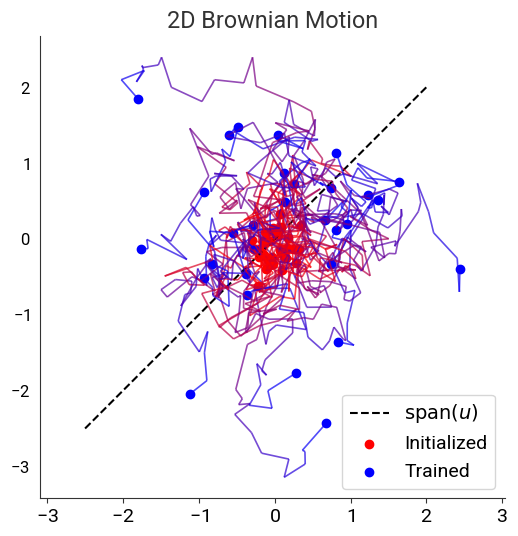

In [21]:
import matplotlib.colors as mcolors
import imageio
import os
from matplotlib.collections import LineCollection

# Simulated trajectories: (num_models, num_steps, 2D)
n_models = 30
n_steps = 30

trajectories = np.cumsum(np.random.randn(n_models, n_steps, 2) * 0.2, axis=1)
initial_points = trajectories[:, 0]
final_points = trajectories[:, -1]
colors = [plt.cm.coolwarm(i / (n_steps - 2)) for i in range(n_steps - 1)]

def red_to_blue_gradient(n):
    cmap = mcolors.LinearSegmentedColormap.from_list("redblue", ["#ff0000", "#0000ff"])
    return [mcolors.to_hex(cmap(i / (n - 1))) for i in range(n)]
    
colors = red_to_blue_gradient(n_steps)

with plt.style.context(genevive['bar_vivid']):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Reference line: span(u)
    x_ref = np.linspace(-2.5, 2, 100)
    ax.plot(x_ref, x_ref, '--', color='black', label=r"$\mathrm{span}(u)$")
    
    # Trajectories
    for i in range(n_models):
        segments = np.stack([trajectories[i, :-1], trajectories[i, 1:]], axis=1)
        lc = LineCollection(segments, colors=colors, linewidths=1.2, alpha=0.7)
        ax.add_collection(lc)
        
    ax.autoscale()
    ax.set_aspect('equal')
    # Scatter initial/final
    plt.scatter(initial_points[:,0], initial_points[:,1], color='red',label="Initialized")
    plt.scatter(final_points[:,0], final_points[:,1], color='blue', label="Trained")

    plt.legend()
    plt.title("2D Brownian Motion")
    plt.axis("equal")
    plt.show()


In [54]:
# ── Setup ──
n_models = 30
n_steps = 150
trajectories = np.cumsum(np.random.randn(n_models, n_steps, 2) * 0.2, axis=1)
initial_points = trajectories[:, 0]
final_points = trajectories[:, -1]

In [58]:
from ou_noise import ou 
from tqdm import tqdm 
n_models=30
n_steps=150
t = np.arange(0, 1.5, 0.01)
traj_x = np.array([ou.path(0.0, t, 1.5, 0.5, 0.45) for _ in range(n_models)])      # shape=(3000,)
traj_y = np.array([ou.path(0.0, t, 1.5, 0.5, 0.45) for _ in range(n_models)])      # shape=(3000,)
trajectories = np.stack([traj_x, traj_y], axis=2)

In [59]:
# Output directory
os.makedirs("frames", exist_ok=True)
filenames = []


# Red-to-blue gradient
def red_to_blue_gradient(n):
    cmap = mcolors.LinearSegmentedColormap.from_list("redblue", ["#ff0000", "#0000ff"])
    return [cmap(i / (n - 1)) for i in range(n)]

colors = red_to_blue_gradient(n_steps)

# ── Generate frames ──
with plt.style.context(genevive['bar_vivid']):
    for t in tqdm(range(2, n_steps + 1), desc='Trajectory building...'):
        fig, ax = plt.subplots()

        # Reference line
        #x_ref = np.linspace(-2.5, 2, 100)
        #ax.plot(x_ref, x_ref, '--', color='black', label=r"$\mathrm{span}(u)$")

        # Trajectories up to step t
        for i in range(n_models):
            if t >= 2:
                segments = np.stack([trajectories[i, :t - 1], trajectories[i, 1:t]], axis=1)
                seg_colors = colors[:t - 1]
                lc = LineCollection(segments, colors=seg_colors, linewidths=1.2, alpha=0.7)
                ax.add_collection(lc)

        ax.scatter(trajectories[:, 0, 0], trajectories[:, 0, 1], s=10, color='red', label="Initialized")
        ax.scatter(trajectories[:, t - 1, 0], trajectories[:, t - 1, 1], s=10, color=colors[t-1], label="Step")

        ax.set_aspect('equal')
        ax.legend(loc="upper left")
        ax.set_xlim(0, 1.0)
        ax.set_ylim(0, 1.0)
        ax.set_title(f"Ornstein Uhlenbeck Process Step {t - 1}", fontsize=14, weight='bold')

        filename = f"frames/frame_{t:03d}.png"
        filenames.append(filename)
        plt.tight_layout()
        plt.savefig(filename)
        plt.close()

# ── Create GIF ──
with imageio.get_writer("trajectory_animation_OU.gif", mode="I", duration=0.1, loop=0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print("✅ GIF saved as trajectory_animation_OU.gif")


Trajectory building...: 100%|██████████| 149/149 [00:29<00:00,  5.10it/s]
/tmp/ipykernel_65513/1787429292.py:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF saved as trajectory_animation_OU.gif


## Plot

`new_data/BLUE_over_k.csv` 
| $\epsilon$ | $k=2$  | $k=3$  | $k=6$  | $k=8$  |
|------------|--------|--------|--------|--------|
| 0.5        | 18.56  | 19.14  | 19.99  | 18.63  |
| 1          | 19.24  | 19.02  | 19.82  | 19.16  |
| 3          | 19.21  | 19.1   | 19.77  | 19.72  |
| 8          | 20.03  | 19.66  | 20.15  | 19.78  |
| $\infty$   | 20.06  | 20.04  | 20.05  | 20.2   |

Since our classes is aligned in the first row. **Set the label_axis="row" (default value)**

monet = MonetPlot("new_data/BLEU_over_k.csv", xaxis=True, CI=False)

monet.plot(xlabel="Epsilon", ylabel="BLEU", marker="enum", grid=True, skeleton=False, ybins=5, 
                title="BLUE score over k", legend=True, markersize=8, path="figure14.png")

### With confidence interval 
The \<filename\>_CI.csv file should be written without x-axis

`BLEU_over_k_CI.csv` 
| $k=2$ | $k=3$ | $k=6$ | $k=8$ |
|-------|-------|-------|-------|
| 0.11  | 0.13  | 0.10  | 0.12  |
| 0.14  | 0.12  | 0.11  | 0.13  |
| 0.09  | 0.15  | 0.12  | 0.10  |
| 0.13  | 0.11  | 0.14  | 0.12  |
| 0.10  | 0.12  | 0.13  | 0.11  |

### 여러가지 plot chart

<Axes: title={'center': 'ROUGE-L Score'}>

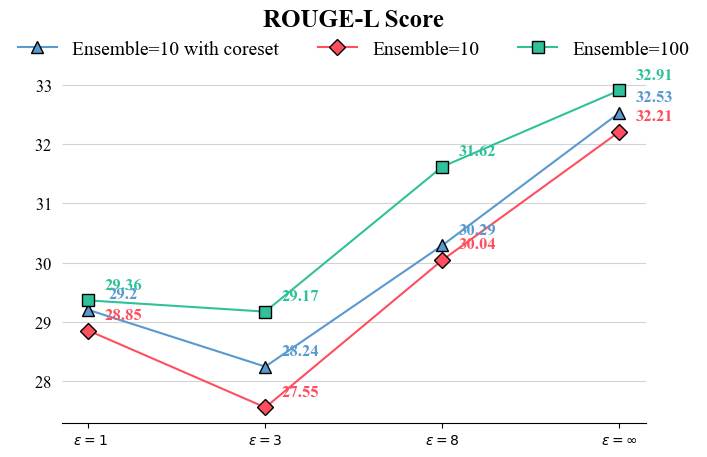

In [12]:
monet = MonetPlot("new_data/coreset.csv", xaxis=True, label_axis='col', CI=False)
monet.plot(ylabel="", marker="enum", linestyle="-", grid=True, text_marker=True, legend=True, text_offset=(0.2,0.2),
                title="ROUGE-L Score", markersize=8, path="figuretemp.png", text_size=12, bbox_anchor=(0.5, 1.15))

<Axes: title={'center': 'BLEU Score over $k$'}, xlabel='Epsilon', ylabel='BLEU'>

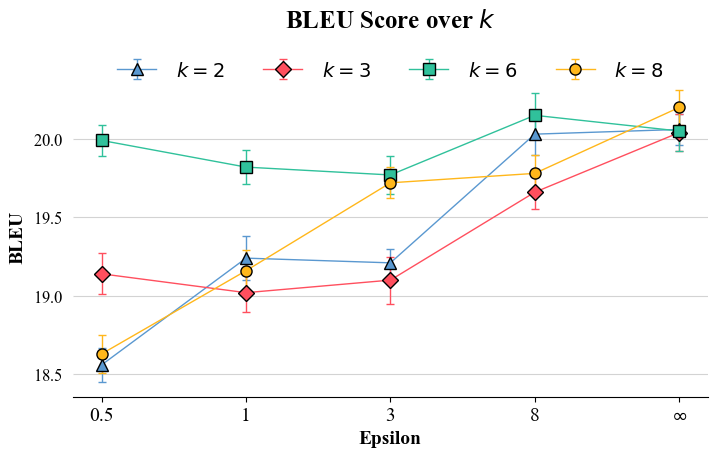

In [13]:
monet = MonetPlot("new_data/BLEU_over_k.csv", xaxis=True, CI=True)

monet.plot(xlabel="Epsilon", ylabel="BLEU", marker="enum", linestyle="-", grid=True, ybins=5,    
                title="BLEU Score over $k$", legend=True, markersize=8, path="figuretemp.png")

<Axes: title={'center': 'ROUGE-L Score'}, xlabel='Epsilon'>

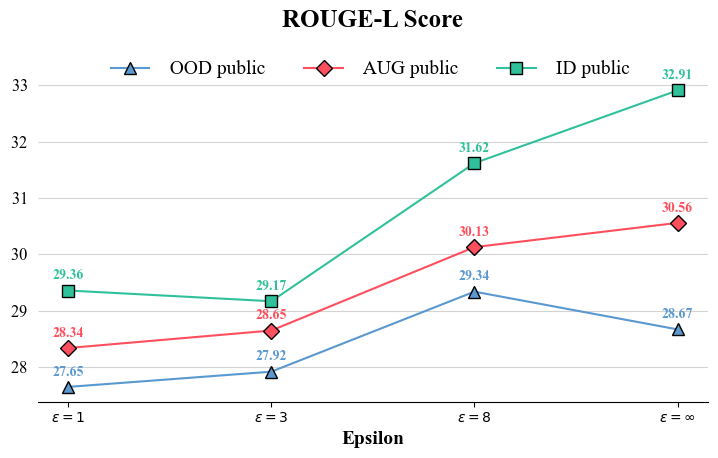

In [14]:
monet = MonetPlot("new_data/aug_ROUGEL.csv", label_axis='row', xaxis=True, CI=False)

monet.plot(xlabel="Epsilon", ylabel="", marker="enum", linestyle="-", grid=True, ybins=6, text_marker=True, shade=False, 
                title="ROUGE-L Score", legend=True, markersize=8, path="aug_ROUGEL.png", text_offset=(0.0, 0.2))

<Axes: title={'center': 'ROUGE-L Score'}, xlabel='Ratio'>

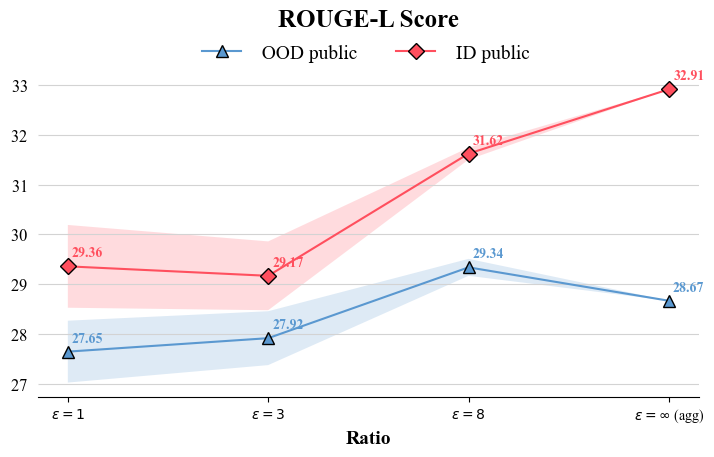

In [15]:
monet = MonetPlot(f"new_data/sm_ROUGEL.csv", xaxis=True, CI=True)
monet.plot(xlabel="Ratio", ylabel="", marker="enum", linestyle="-", grid=True, shade=True, text_marker=True, 
                    title="ROUGE-L Score", legend=True, path=f"OOD_ROUGEL.png", bbox_anchor=(0.5,1.15))

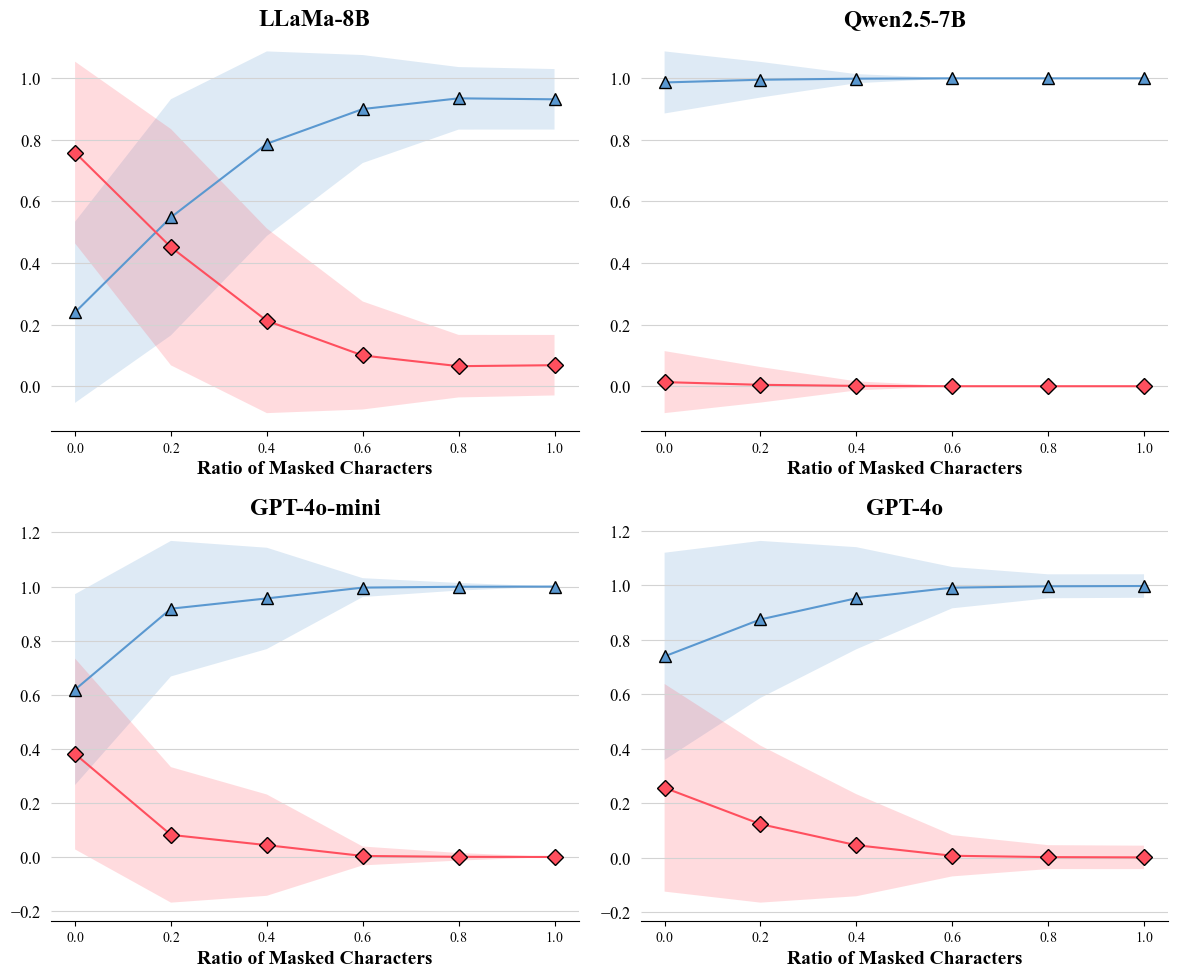

In [17]:
from style.genevive import *

model_list = ["llama3", "qwen2", "gpt-4o-mini", "gpt-4o"]
titles = ["LLaMa-8B", "Qwen2.5-7B", 'GPT-4o-mini', "GPT-4o"]
with plt.style.context(genevive['plot']):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plt.subplots_adjust(
    hspace=0.4,  # subplot 세로 간격
    wspace=0.3   # subplot 가로 간격
    )
    for i, model in enumerate(model_list):
        row, col = divmod(i, 2)
        ax = axs[row][col]

        monet = MonetPlot(f"new_data/ablation_{model}.csv", xaxis=True, CI=True)

        monet.plot(
            xlabel="Ratio of Masked Characters",
            ylabel="",  # 필요한 경우 바꿔도 됨
            marker="enum",
            grid=True, 
            linestyle="-",
            shade=True, 
            legend=False,  # 각 subplot마다 개별 범례가 필요 없으면
            ax=ax
        )
        ax.set_title(titles[i], weight="bold")
    #fig.suptitle("God Damn Internal State", fontsize=20, weight='bold')
    #fig.text(x=0.04, y=0.5, s="Your Y Label Here", va="center", rotation="vertical", fontsize=14, weight="bold")
    fig.tight_layout()
    fig.savefig("ablation_2", dpi=300)

### Two y-scales

`new_data/gdp.csv`
| 지표          | 2012           | 2013           | 2014           | 2015           | 2016           | 2017           | 2018           | 2019           | 2020           | 2021           | 2022           |
|---------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|
| GDP           | "1,440,111.40" | "1,500,819.10" | "1,562,928.90" | "1,658,020.40" | "1,740,779.60" | "1,835,698.20" | "1,898,192.60" | "1,924,498.10" | "1,940,726.20" | "2,071,658.00" | "2,150,575.80" |
| Growth rate   | 2.4            | 3.2            | 3.2            | 2.8            | 2.9            | 3.2            | 2.9            | 2.2            | -0.7           | 4.1            | 2.6            |

Class (지표, GDP)가 first column이기 때문에 label_axis='col'로 세팅 

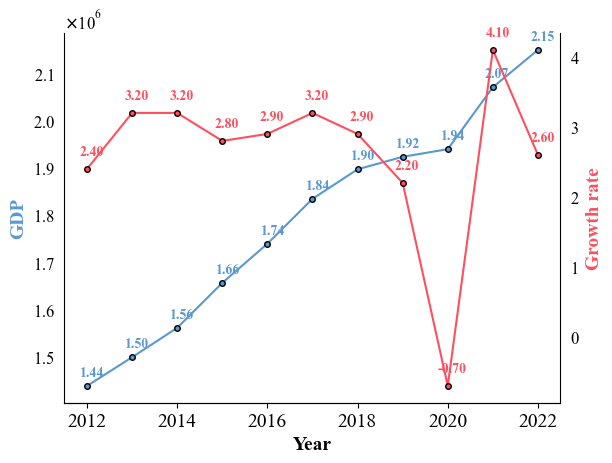

In [21]:
monet = MonetPlot("new_data/gdp.csv", xaxis=True, CI=False, label_axis='col')
monet.two_yscale_plot(grid=False, text_marker=True, xlabel="Year", marker="o", linestyle="-", title="",  markersize=4, path="figure2.png")

## Histogram

`new_data/gaussian.csv`
| Model1         | Model2          | Model3          |
|----------------|-----------------|-----------------|
| 0.7678186120174201 | 2.661799618670969  | 3.0683708888829253 |
| 1.6825388572926325 | -7.499532213752195 | 1.1561417512750813 |
| 1.2828545690810054 | -0.0020305083966962734 | 0.8526270468480346 |


<Axes: title={'center': 'Crime Case Distribution Over the Years'}, ylabel='Count'>

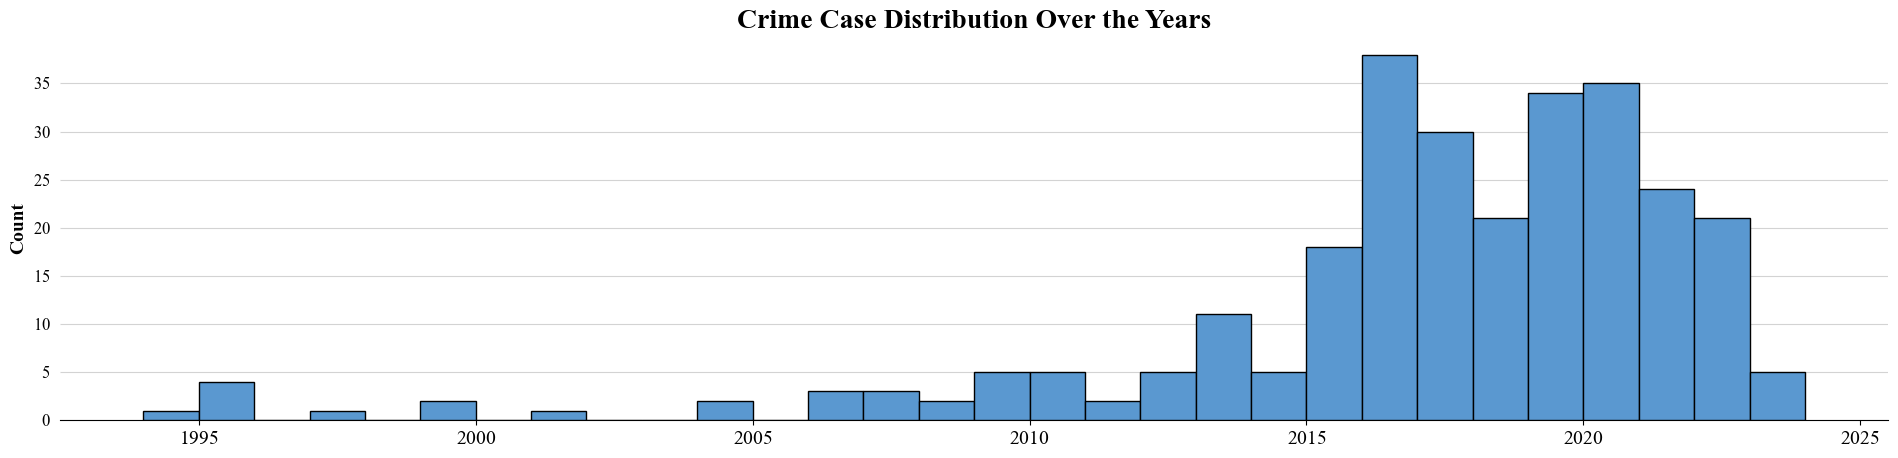

In [22]:
monetplot = MonetPlot("new_data/year.csv")
monetplot.histogram(density=False, ylabel="Count", grid=True, figsize=(19.2,4.8), title="Crime Case Distribution Over the Years", titlesize=20, path="APT/year2", edge=True)

## Bar Chart 
### Class gap ratio (cgr)과 width ratio (wr)을 조절해서 figure 생성 
Class간의 공백:  $\left(cgr-\frac{\#C}{\#C+1}\right)wr$, $\#C$는 클래스의 개수  
Bar의 width: $\frac{wr}{\#C+1}$ 

`new_data/mbar.csv`
| type       | GPT-neo 1.3B | GPT-neo 2.7B | OPT 1.3B | OPT 13B | GPT-3 davinci 002 |
|------------|--------------|--------------|----------|---------|--------------------|
| occupation | 0.3          | 0.4          | 0.5      | 0.4     | 0.51              |
| author     | 0.43         | 0.41         | 0.56     | 0.38    | 0.52              |
| director   | 0.41         | 0.29         | 0.38     | 0.64    | 0.12              |
| country    | 0.12         | 0.23         | 0.14     | 0.52    | 0.25              |

`new_data/mbar_CI.csv`
| GPT-neo 1.3B | GPT-neo 2.7B | OPT 1.3B | OPT 13B | GPT-3 davinci 002 |
|--------------|--------------|----------|---------|--------------------|
| 0.03         | 0.04         | 0.05     | 0.04    | 0.051             |
| 0.043        | 0.041        | 0.056    | 0.038   | 0.052             |
| 0.041        | 0.029        | 0.038    | 0.064   | 0.012             |
| 0.012        | 0.023        | 0.014    | 0.052   | 0.025             |


### Bar chart with an upper bar

In [23]:
from style.genevive import *

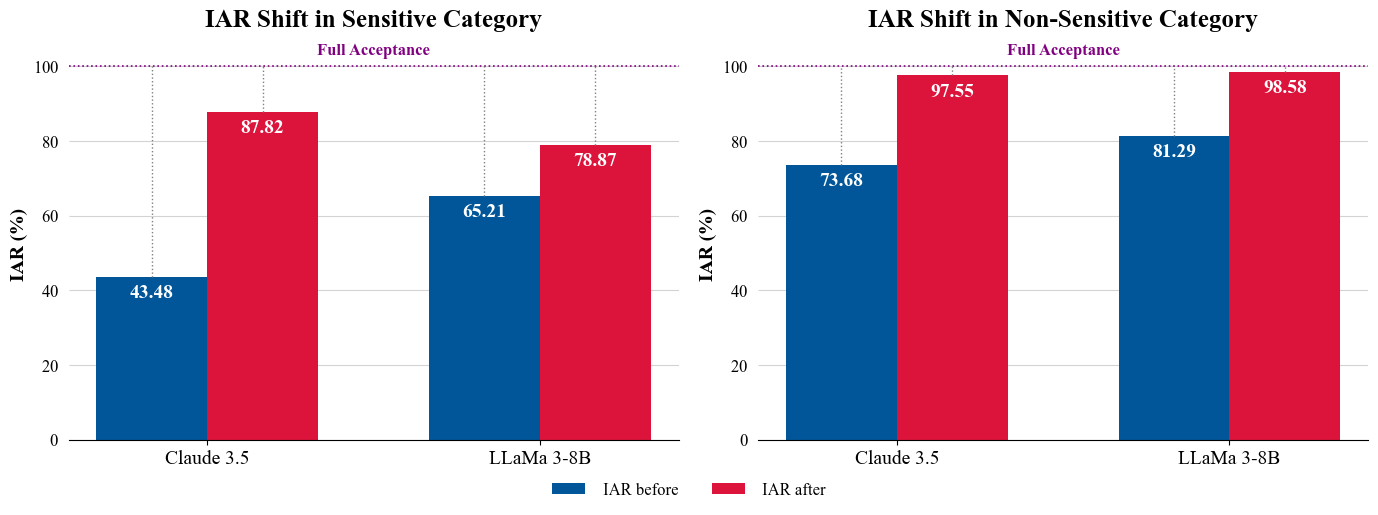

In [24]:
with plt.style.context(genevive['bar_vivid']):
    fig, axs = plt.subplots(1, 2, figsize=(14,5))
    moneplot = MonetPlot("new_data/5_3.csv", xaxis=True, label_axis='row', CI=False) 
    moneplot2 = MonetPlot("new_data/5_3_1.csv", xaxis=True, label_axis='row', CI=False) 

    moneplot.multiple_bar(grid=False, ax=axs[0], cgr=1.0, wr=1.2, ylabel="IAR (%)", show_value=True, minimal=False, legend=False, legend_cols=2, legendsize=12, path="rel_score.png", bbox_to_anchor=(1.0, -0.2), barfontsize=14, inside_value=True, title="IAR Shift in Sensitive Category")
    moneplot2.multiple_bar(grid=False, ax=axs[1], cgr=1.0, wr=1.2, ylabel="IAR (%)", show_value=True, minimal=False, legend=False, legend_cols=1, legendsize=12, path="rel_score.png", bbox_to_anchor=(0.1, 1.10), barfontsize=14, inside_value=True, title="IAR Shift in Non-Sensitive Category")

    # y=100 선 및 주석 추가
    for ax in axs:
        ax.axhline(y=100, color='purple', linestyle=':', linewidth=1.2)
        # x축 범위 구하기
        x_min, x_max = ax.get_xlim()
        x_mid = (x_min + x_max) / 2

        # 중앙에 텍스트 표시
        ax.text(x_mid, 102, "Full Acceptance", ha='center', color='purple', va='bottom', fontsize=12, weight='bold')

        for bar in ax.patches:
            height = bar.get_height()
            if height == 0: continue

            delta = 100 - height
            if delta == 0: continue

            # bar 중심 좌표
            x = bar.get_x() + bar.get_width() / 2
            y1 = height
            y2 = 100

            # 거리 선 그리기
            ax.plot([x, x], [y1, y2], color='gray', linestyle=':', linewidth=1)

            # 선 중간에 텍스트로 거리 표시
            y_text = (y1 + y2) / 2
            #ax.text(x, y_text, f'{delta:.1f}', ha='center', va='center', fontsize=9)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc='lower center',
        ncol=len(labels),
        bbox_to_anchor=(0.5, -0.05),
        fontsize=12,
        frameon=False
    )
    plt.tight_layout()
    plt.savefig("neutralize.png", dpi=300, bbox_inches='tight')
    plt.show()
    

### 여러가지 Bar Chart

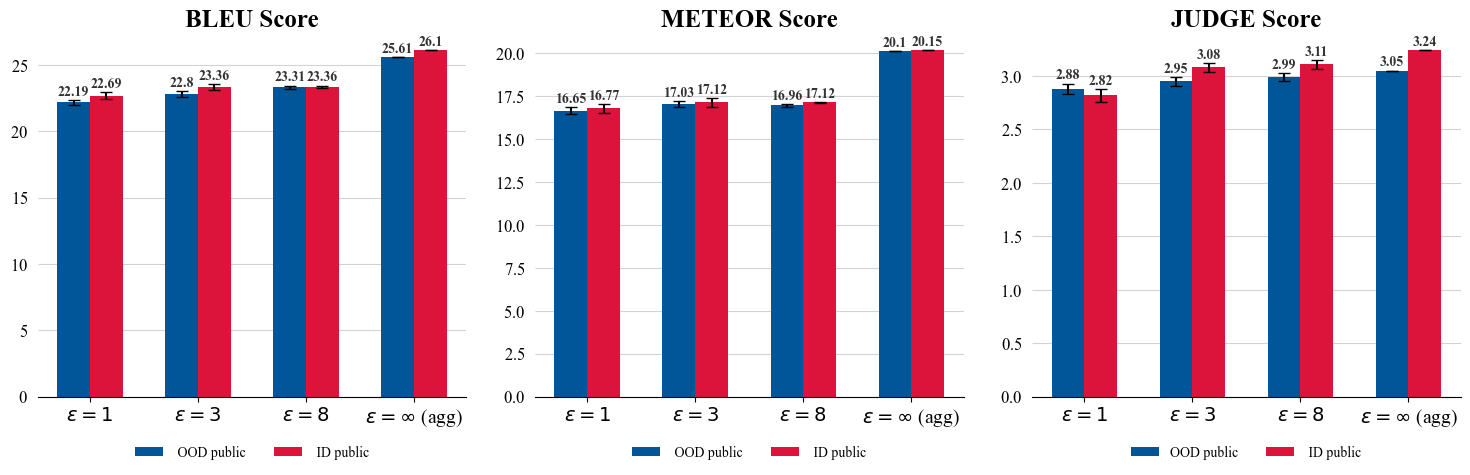

In [25]:
from style.genevive import *
metrics = ["BLEU", "METEOR", "JUDGE"]
#metrics = ["ROUGE1", "ROUGEL", "JUDGE"]
#titles = ["ROUGE-1", "ROUGE-L", "JUDGE"]
with plt.style.context(genevive['bar_vivid']):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, metric in enumerate(metrics):
        # ── 1. Running Time Bar Plot ── #
        moneplot1 = MonetPlot(f"new_data/OOD_{metric}.csv", xaxis=True, CI=True)
        moneplot1.multiple_bar(
            ax=axs[i],
            grid=True,
            cgr=1.1,
            wr=1.3,
            show_value=True,
            minimal=False,
            legend_cols=3,
            title_padding=5, 
            title=f"{metrics[i]} Score"
        )

    # ── 전체 저장 및 출력 ── #
    plt.tight_layout()
    plt.savefig("ood_qa.png", dpi=300)
    plt.show()

<Axes: ylabel='ASR (%)'>

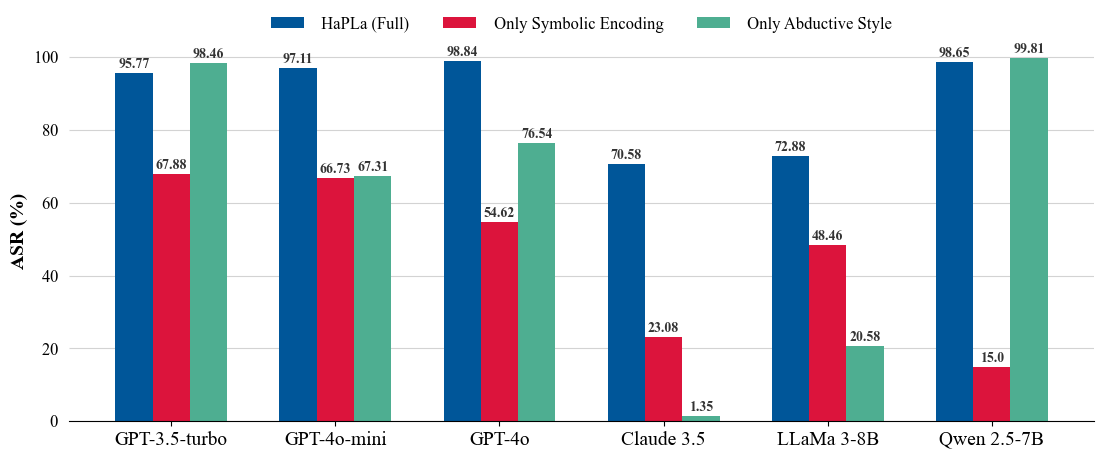

In [26]:
moneplot = MonetPlot("new_data/ablation_HaPLa.csv", xaxis=True, CI=False) 

moneplot.multiple_bar(grid=False, cgr=1.1, wr=1.6, ylabel="ASR (%)", show_value=True, minimal=False, legend_cols=3, legendsize=12, path="ablation.png", bbox_to_anchor=(0.5, 1.1))

### Bar Chart with CI

<Axes: title={'center': 'AUROC Results for Repeat Attacks'}>

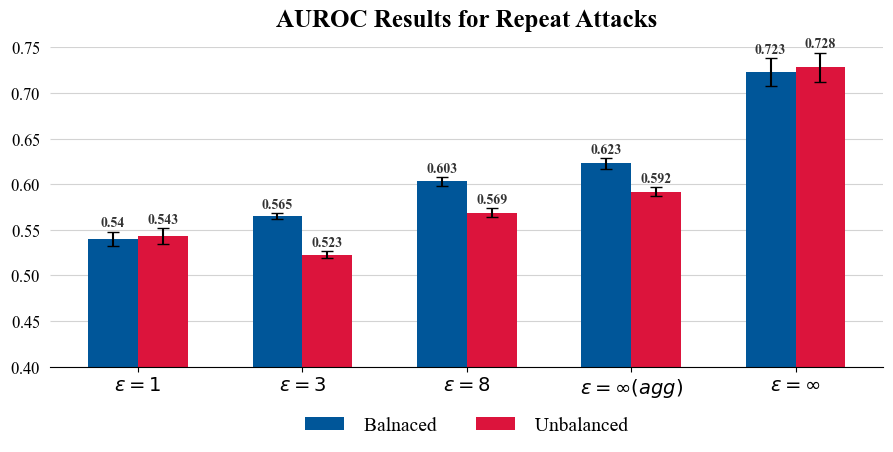

In [28]:
moneplot = MonetPlot("new_data/MIA.csv", xaxis=True, CI=True) 

moneplot.multiple_bar(grid=False, xlabel="",  cgr=1.1, wr=1.3, show_value=True, minimal=False, legend_cols=2, legendsize=14, ylim=(0.4, 0.75), 
title="AUROC Results for Repeat Attacks", path="MIA.png")

### Legend를 위해 간격이 필요할 떄 `ylim` 조정할 수도 있음

<Axes: title={'center': 'Multiple bar chart'}>

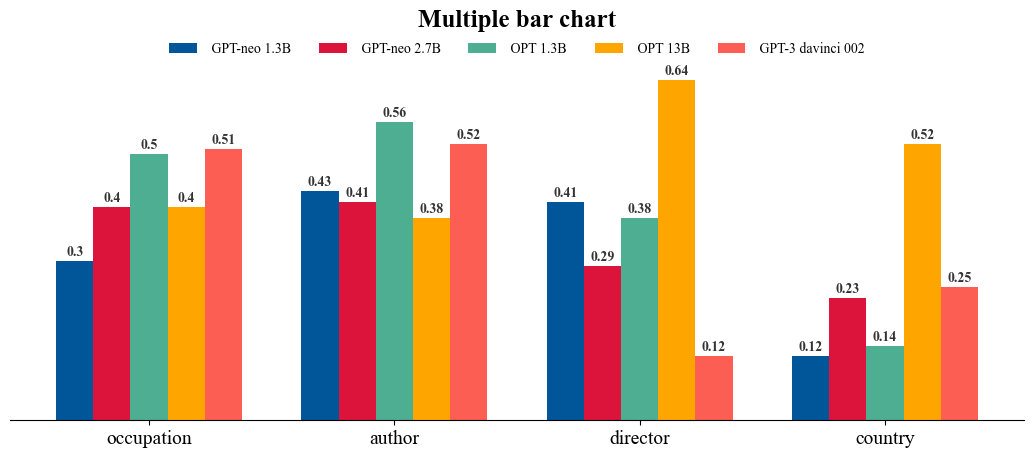

In [34]:
moneplot = MonetPlot("new_data/mbar.csv", xaxis=True, CI=False) 

moneplot.multiple_bar(grid=True, ylabel="",  cgr=1.1, wr=1.5, show_value=True, minimal=True, legend_cols=5,
title="Multiple bar chart", path="barchart.png", bbox_to_anchor=(.5, 1.05), ylim=(0, 0.7))

### 수평 Bar Chart

<Axes: title={'center': 'Top1-Count by Model'}>

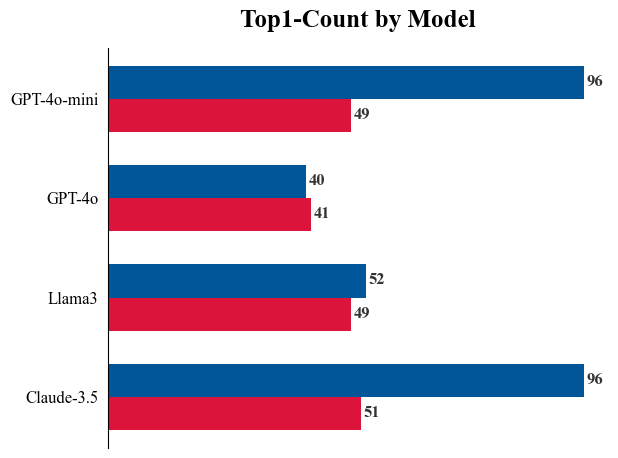

In [31]:
filename = "winlose"
monetplot = MonetPlot(f"new_data/{filename}.csv", label_axis='row', xaxis=True, CI=False)
monetplot.multiple_bar(cgr=1.0, wr=1.0, show_value=True, minimal=True, 
title="Top1-Count by Model", legend=False, hbar=True, barfontsize=12, path=f"APT/{filename}.png")

### 수치가 annotate된 수평 Bar Chart

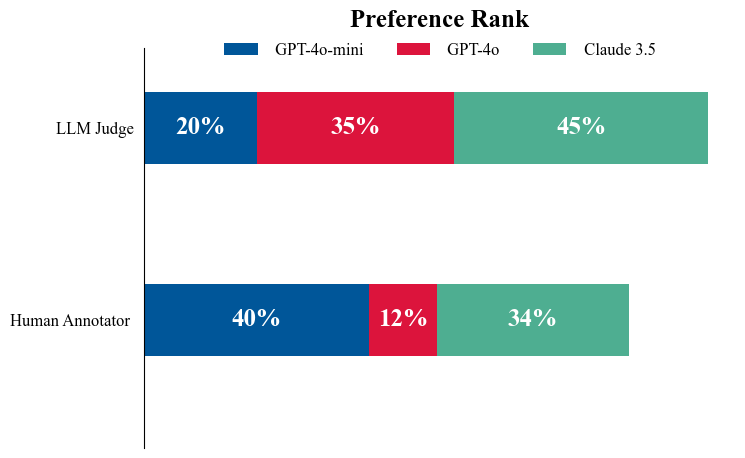

In [23]:
cycle=[
    "#FF7F50",
    "#008080",
    "#6A5ACD",
    "#808000",
    "#D3D3D3",
]
with plt.rc_context({'axes.prop_cycle': cycler(color=cycle), 'legend.frameon': True}):
    moneplot = MonetPlot("new_data/comp_copy.csv", xaxis=True, CI=False) 
    moneplot.multiple_bar(grid=False, xlabel="", ylabel="", cgr=1.0, wr=1.2, minimal=True, show_value=True, hbar=True, bbox_to_anchor=(.5,1.05), postfix='%', 
                    title="Preference Rank", titlesize=18, legendsize=12, path="comp.png", legend_cols=3, stacked=True, barfontsize=18)

<Axes: title={'center': 'GPT Judge A/B Test'}>

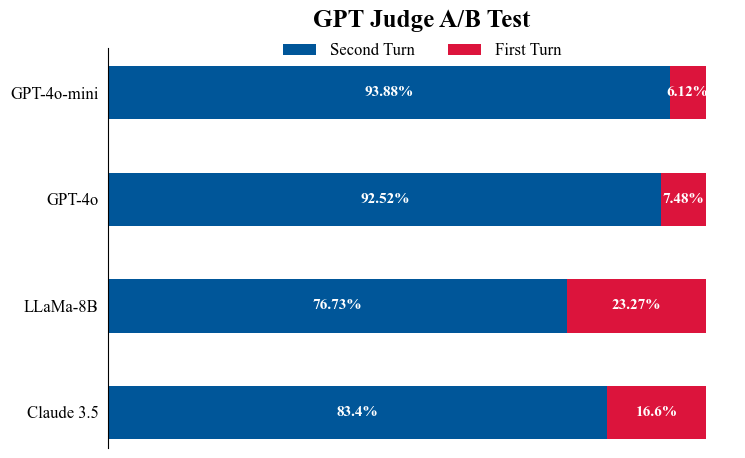

In [22]:
moneplot = MonetPlot("new_data/fvss.csv", xaxis=True, CI=False) 
moneplot.multiple_bar(grid=False, xlabel="", ylabel="", cgr=1.0, wr=1.2, minimal=True, show_value=True, hbar=True, bbox_to_anchor=(.5,1.05), postfix='%', 
                    title="GPT Judge A/B Test", titlesize=18, legendsize=12, path="comp12.png", legend_cols=3, stacked=True, barfontsize=11)

## Direct figure with plot 

<Axes: >

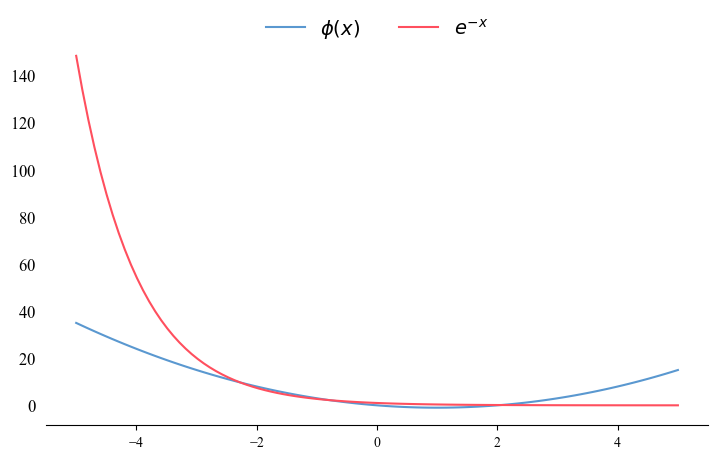

In [18]:
x = np.linspace(-5,5,100)
y1 = np.power(x,2) - 2*x 
y2 = np.exp(-x)
y = np.array([y1,y2])
labels = np.array(["$\phi(x)$", "$e^{-x}$"])

moneplot = MonetPlot(xaxis=True, x0=x, yy=y, labels=labels)
moneplot.plot(xlabel="", ylabel="", linestyle= 'solid', legend=True, path="figure13.png")

## Miscellaneous

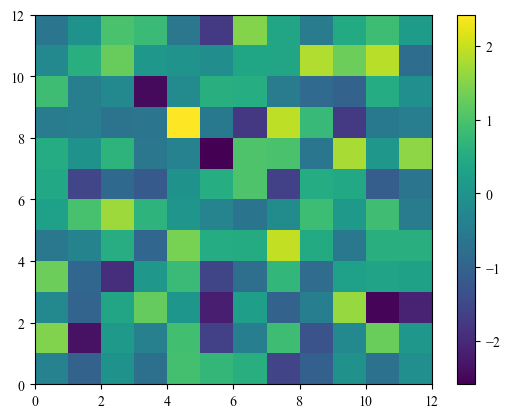

In [20]:
matrix = np.random.standard_normal(size=(12,12))
MonetPlot.display_array(matrix, cmap="viridis")

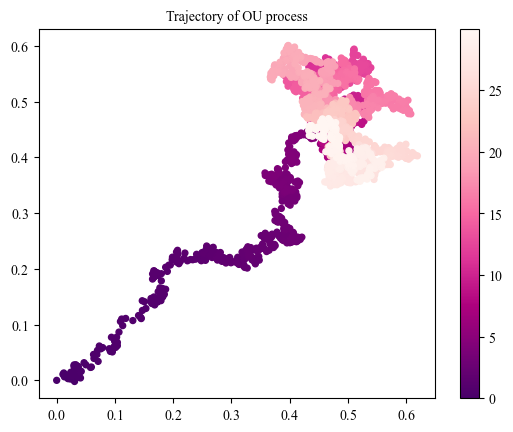

In [21]:
from ou_noise import ou 
t = np.arange(0, 30, 0.01)
x = ou.path(0.0, t, .4, 0.5, 0.05)
y = ou.path(0.0, t, .4, 0.5, 0.05)
MonetPlot.scatter(x,y,timestamp=t, title="Trajectory of OU process")